### transformation to make the distrubuation normal , using algo BOXCOX and kjhonson 
### both are present in the PowerTransformer of the scikit learn library 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import scipy.stats as stats

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


In [21]:
df = pd.read_csv(r'c:\Users\Admin\Documents\DataSets\concrete_data.csv')

In [10]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [11]:
df.shape

(1030, 9)

In [12]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [47]:
X = df.drop(columns=['Strength'],axis=1)
Y=df['Strength']

In [48]:
X.shape

(1030, 8)

In [49]:
Y.shape

(1030,)

In [50]:
X_train ,X_test , Y_train , Y_test =train_test_split(X , Y , test_size =0.2 , random_state=42)

In [51]:
X_train.shape

(824, 8)

In [52]:
X_test.shape

(206, 8)

In [53]:
Y_train.shape


(824,)

In [54]:
Y_test.shape

(206,)

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [197]:
X_train_transformed=scaler.fit_transform(X_train)
X_test_transformed=scaler.fit_transform(X_test)


In [198]:
X_train_transformed = pd.DataFrame(X_train_transformed , columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed , columns=X_test.columns)

In [80]:
X_train_transformed.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.160877,0.857387,0.982449,-0.314285,1.481654,-0.257462,-0.64752,-0.275673


In [56]:
#Apply linearregression without any transformation 
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred= model.predict(X_test)
y_pred
r2_score(Y_test,y_pred)

0.6275531792314848

r2 score after transformation 


In [82]:
model = LinearRegression()
model.fit(X_train_transformed , Y_train )
y_pred1 = model.predict(X_test_transformed)
r2_score(Y_test , y_pred1)

0.6189650039386507

In [83]:
# Crossing checking with cross validation score 
model = LinearRegression()
np.mean(cross_val_score(model , X , Y , scoring ='r2'))

np.float64(0.4609940491662864)

In [66]:
import seaborn as sns

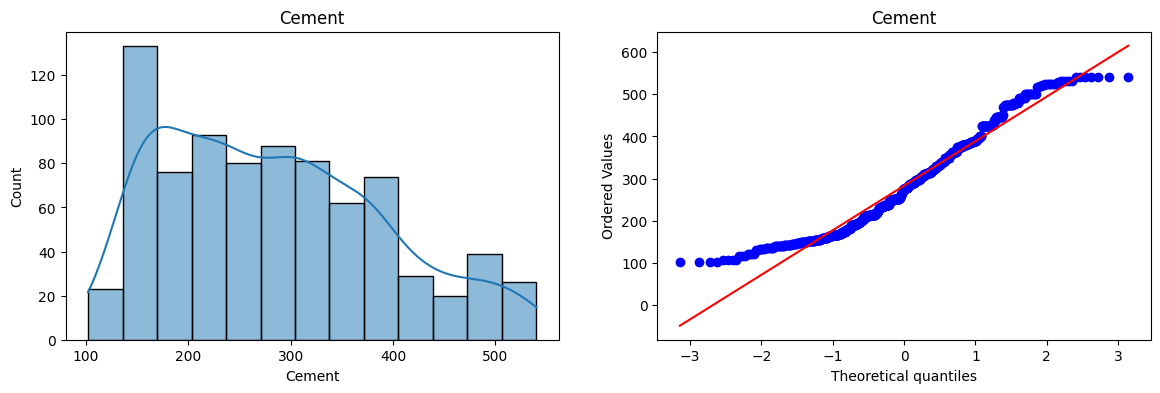

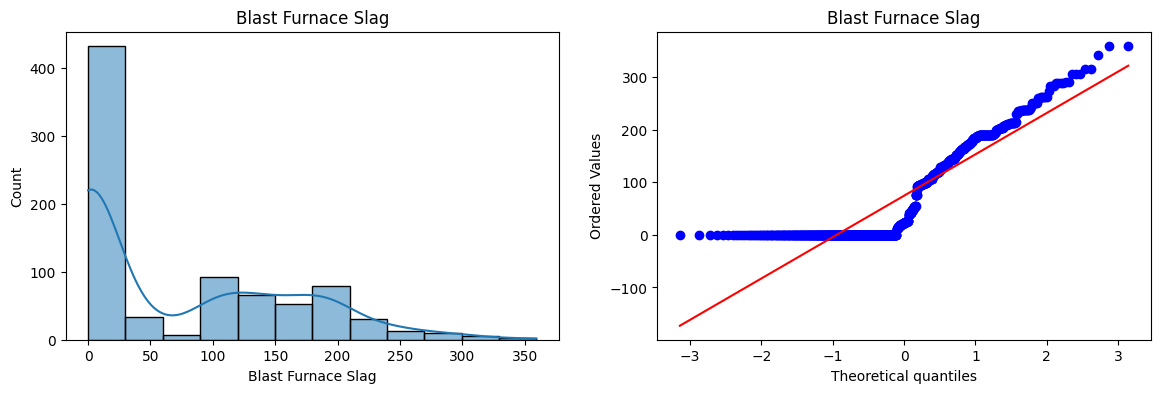

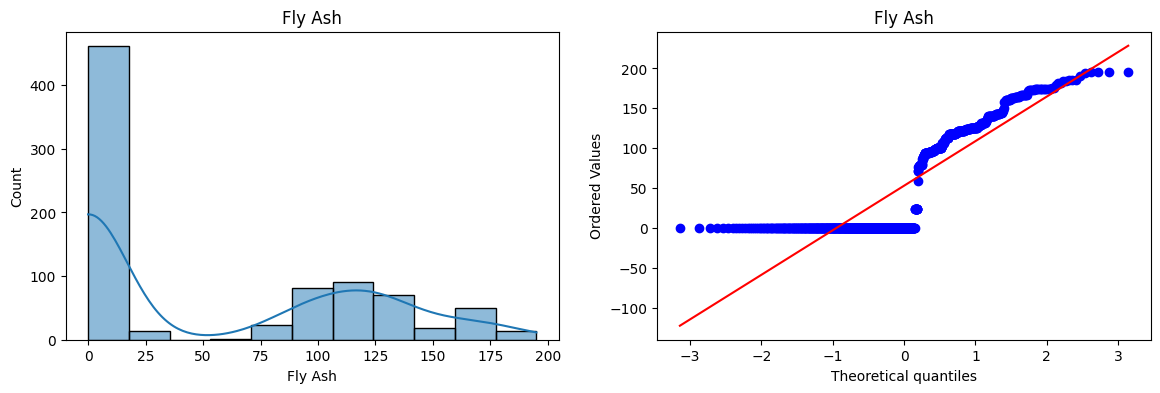

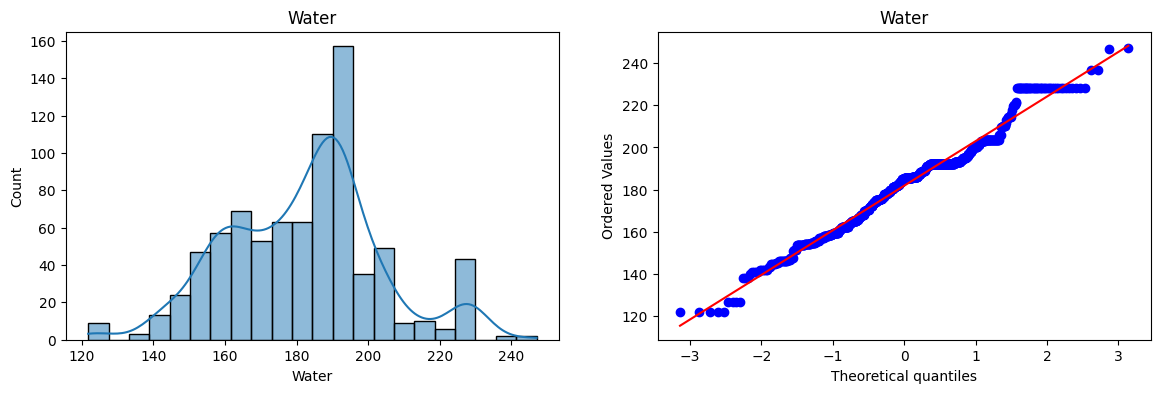

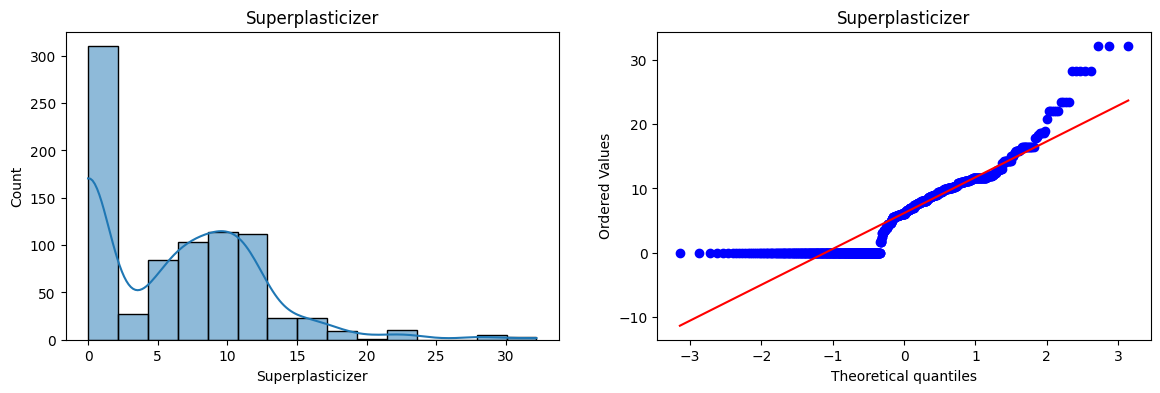

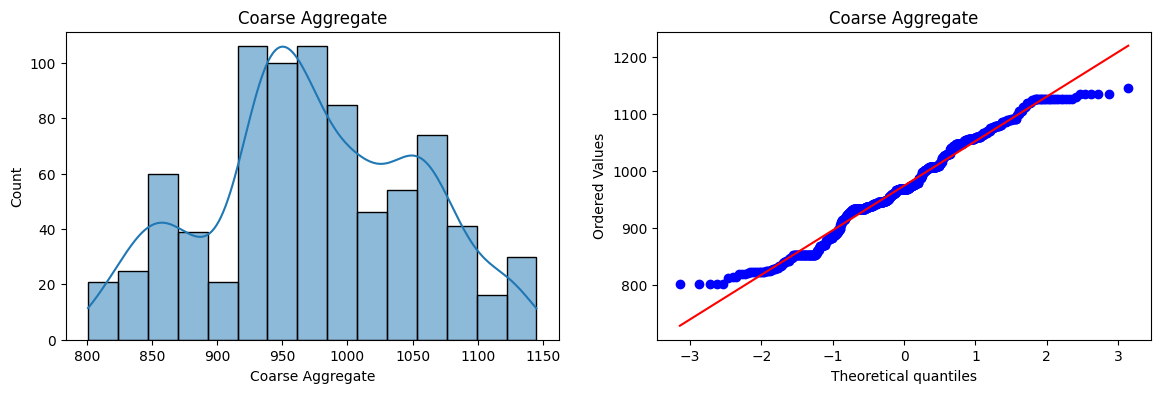

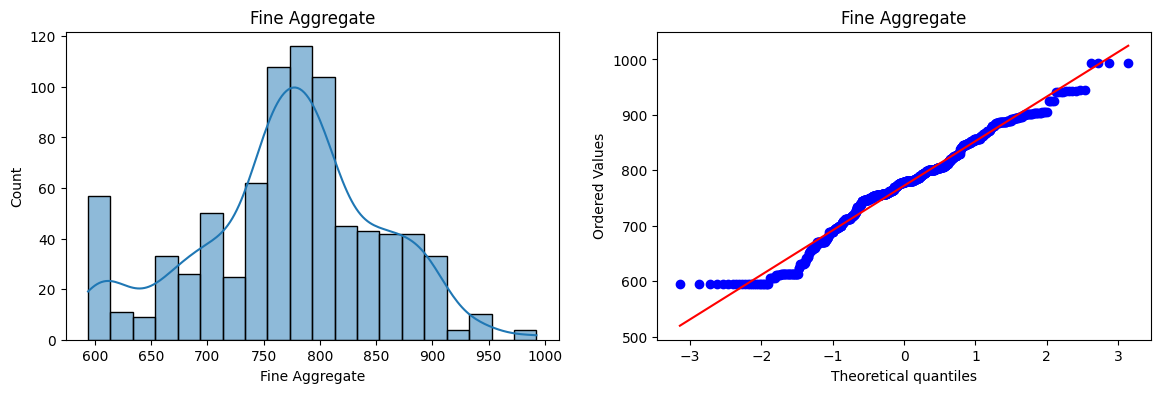

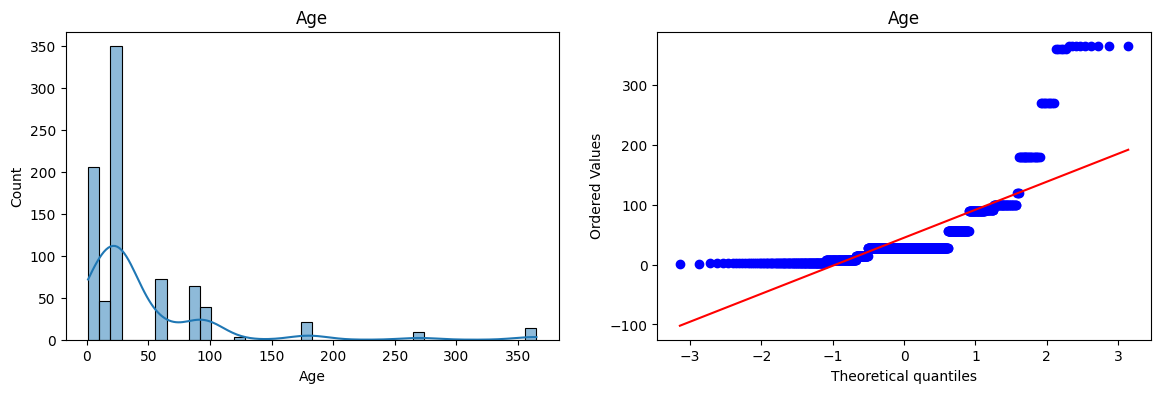

In [70]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True) #Kde plot 
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt) #QQ plot
    plt.title(col)

    plt.show()


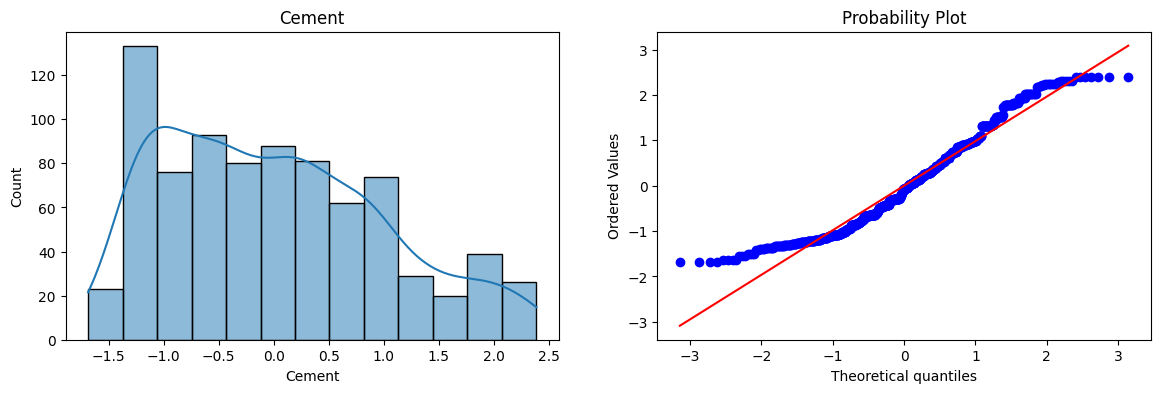

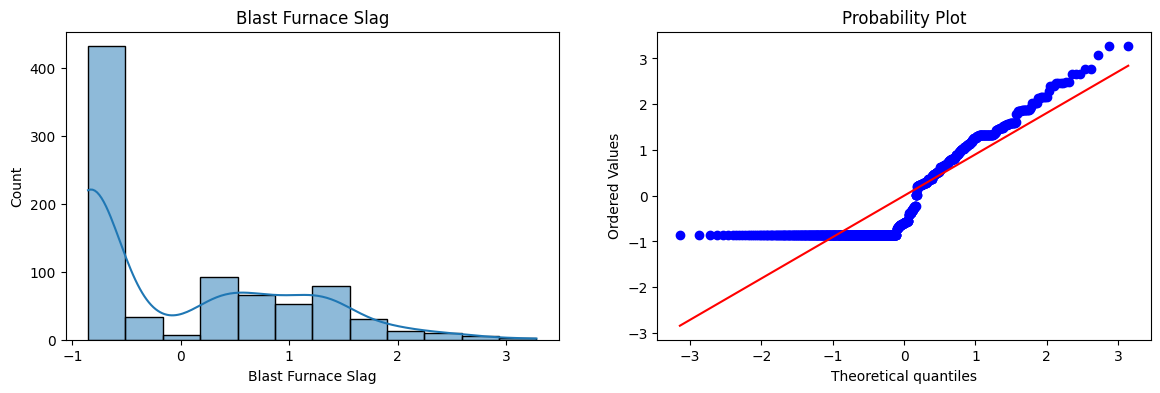

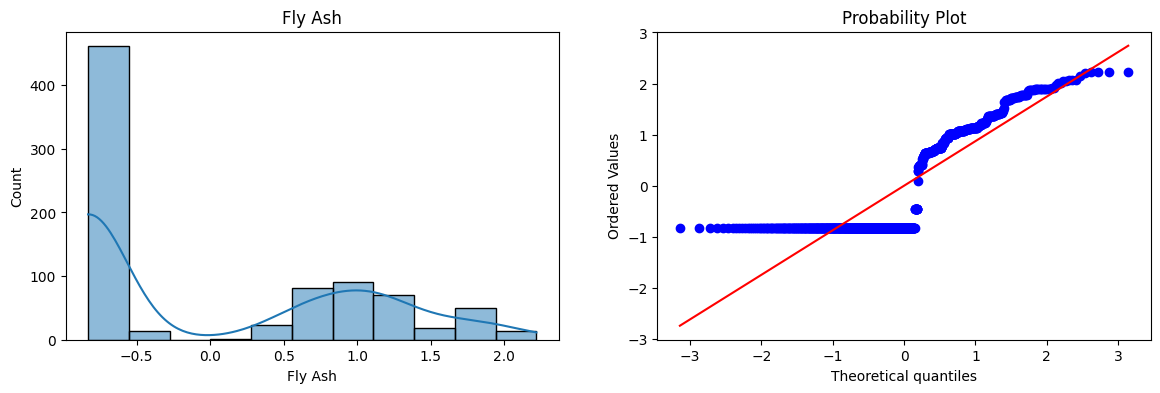

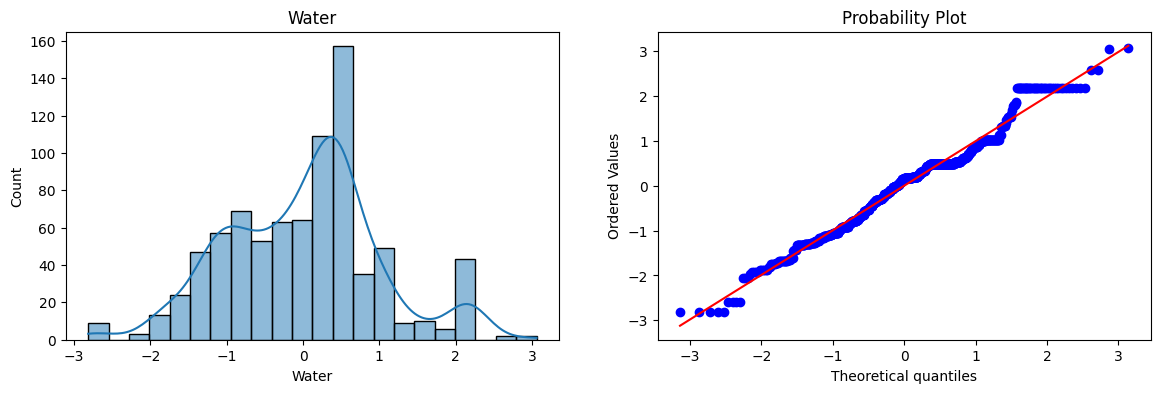

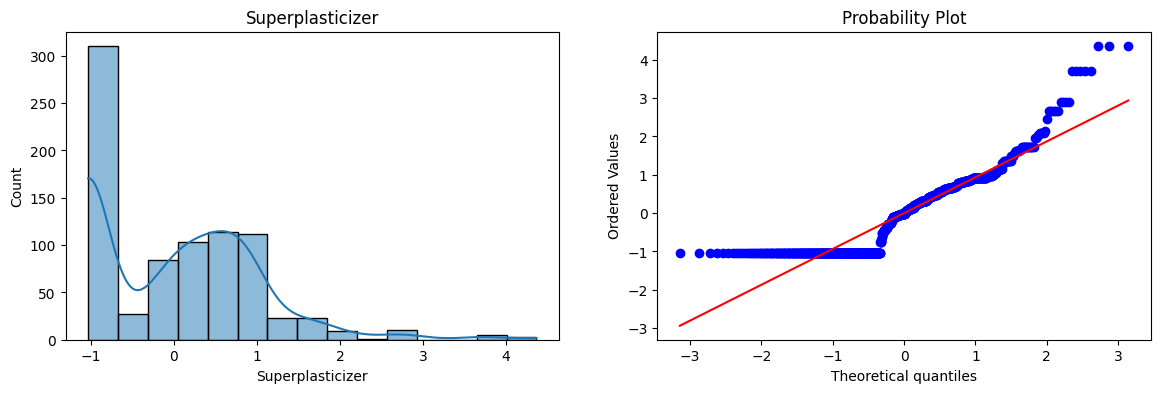

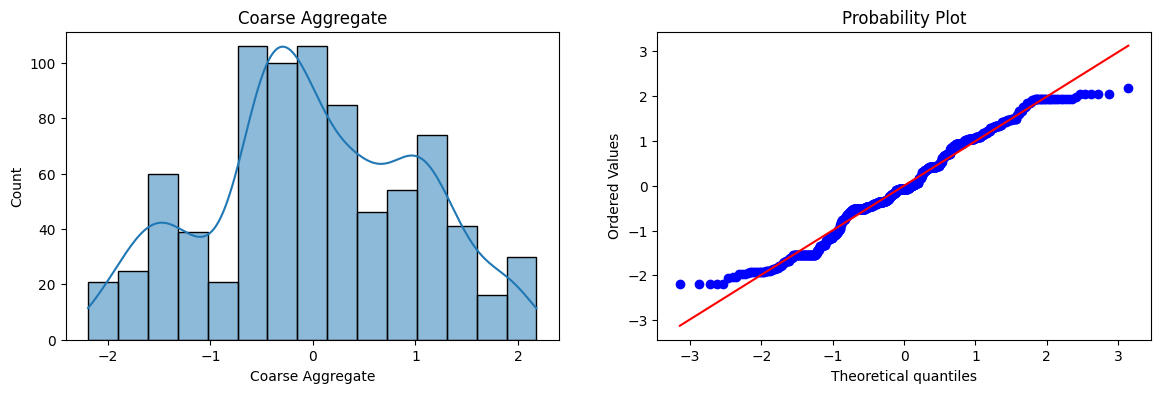

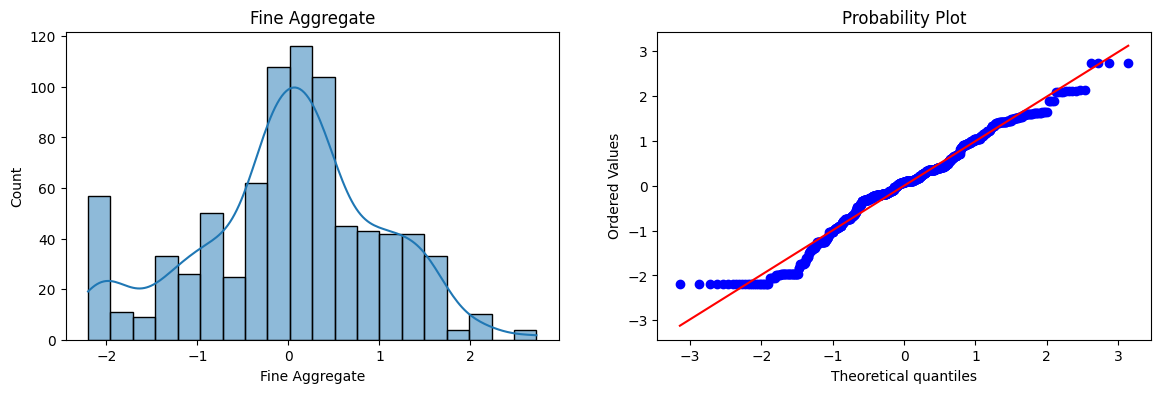

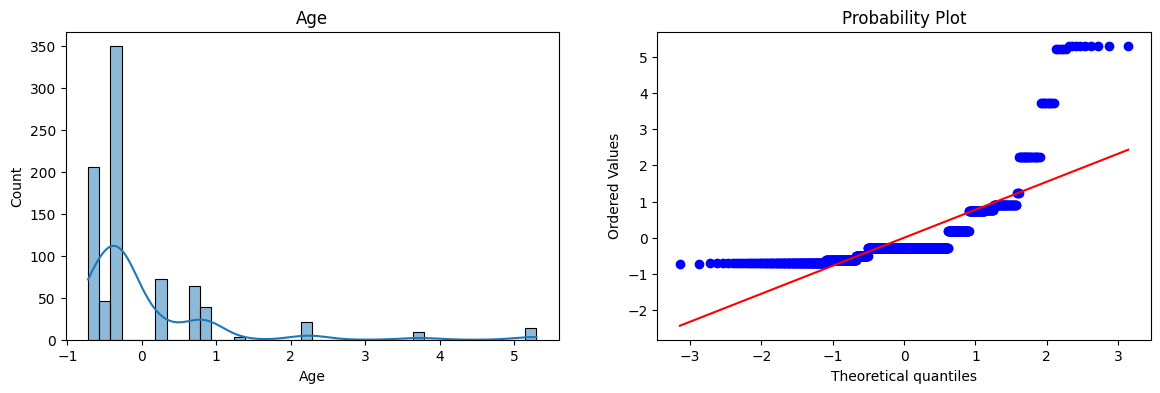

In [85]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed[col],kde=True) #Kde plot 
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)

    plt.show()


In [101]:
pt = PowerTransformer(method='box-cox') # to make the distribution normal or guassion 
X_train_transformed=pt.fit_transform(X_train+0.000001)
X_test_transformed=pt.fit_transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'lambda':pt.lambdas_})


,cols,lambda
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [102]:
# Applying Linearregression again on the transformed data :
model = LinearRegression()
model.fit(X_train_transformed , Y_train)
y_pred2 = model.predict(X_test_transformed)
r2_score(Y_test ,y_pred2)

0.8055320988034842

In [104]:
X_train_transformed = pd.DataFrame(X_train_transformed , columns=X_train.columns)

In [107]:
Cross_val_score=np.mean(cross_val_score(model , X_train_transformed , Y_train ,scoring='r2'))
Cross_val_score.item()*100

79.23976629391281

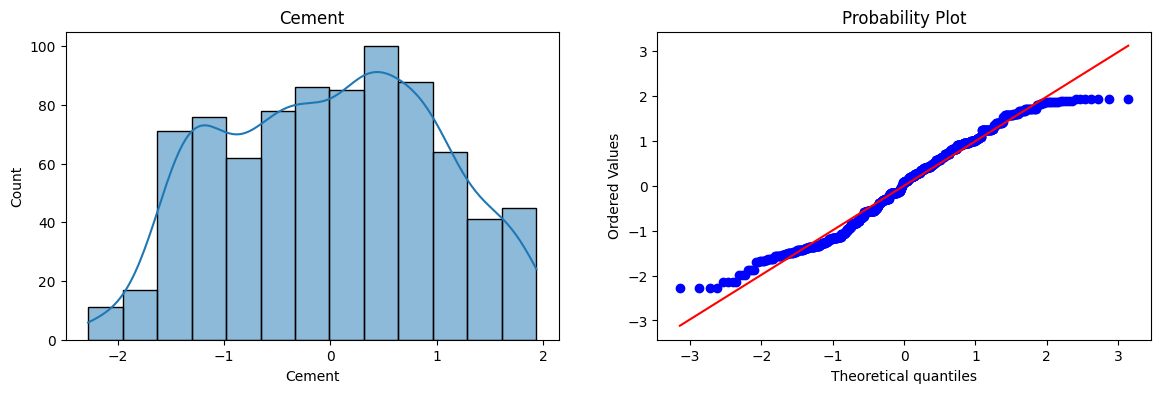

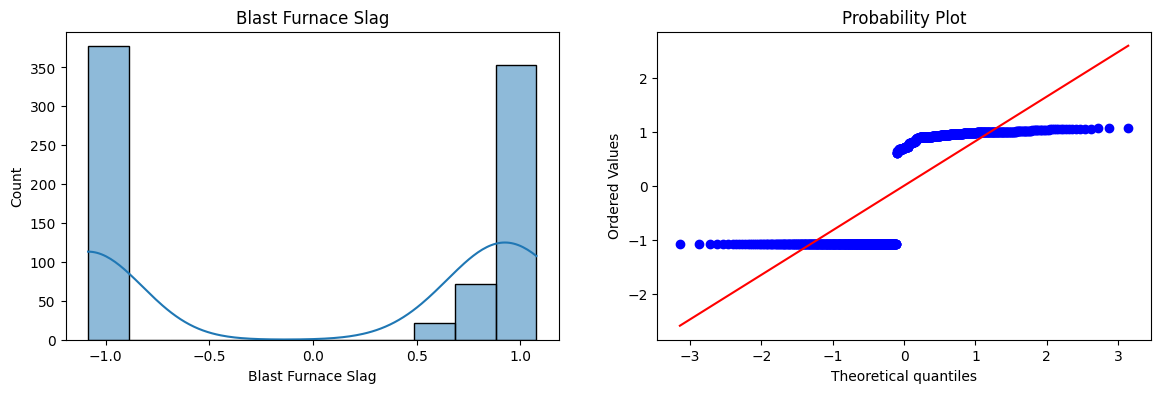

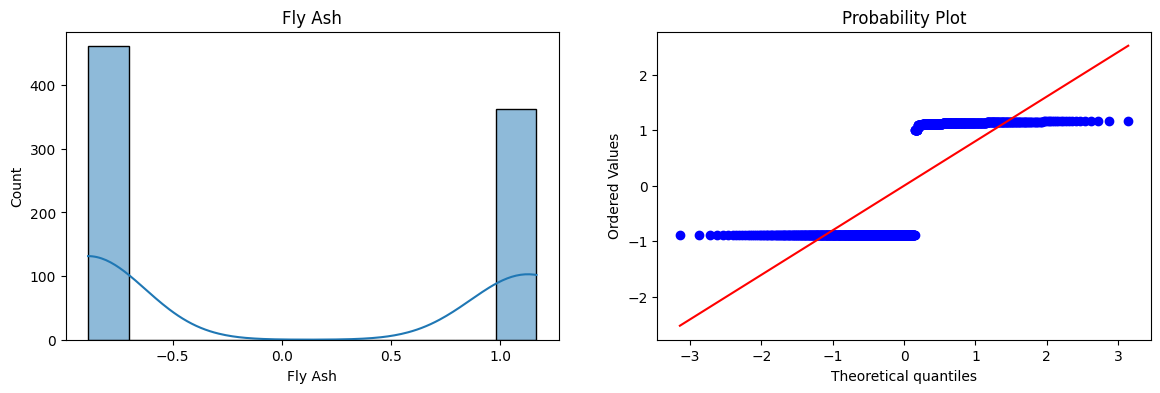

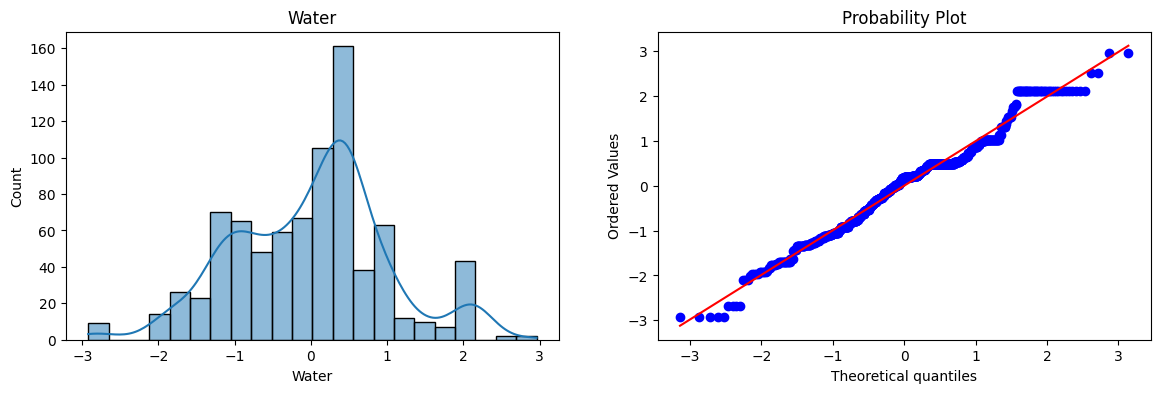

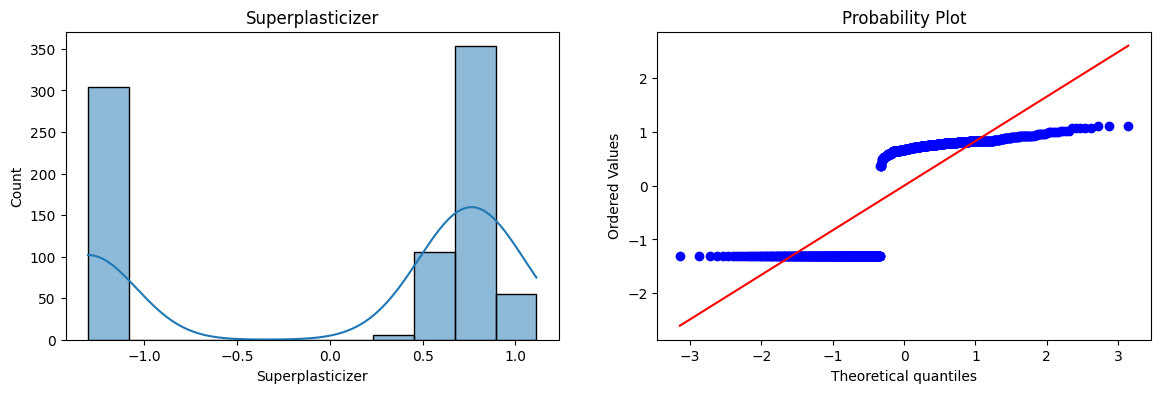

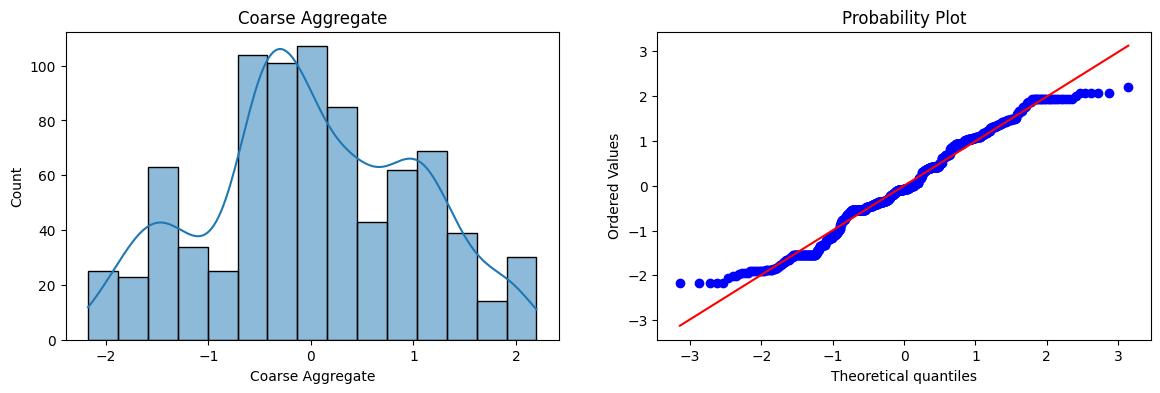

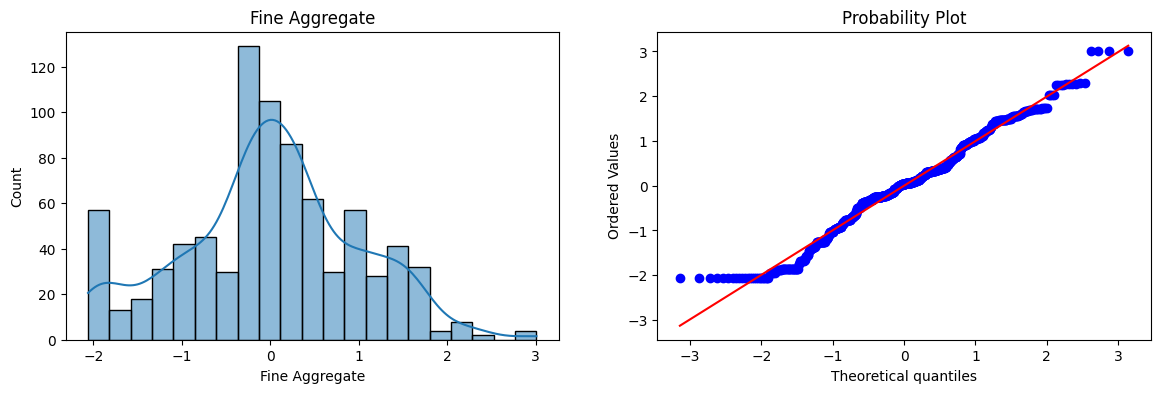

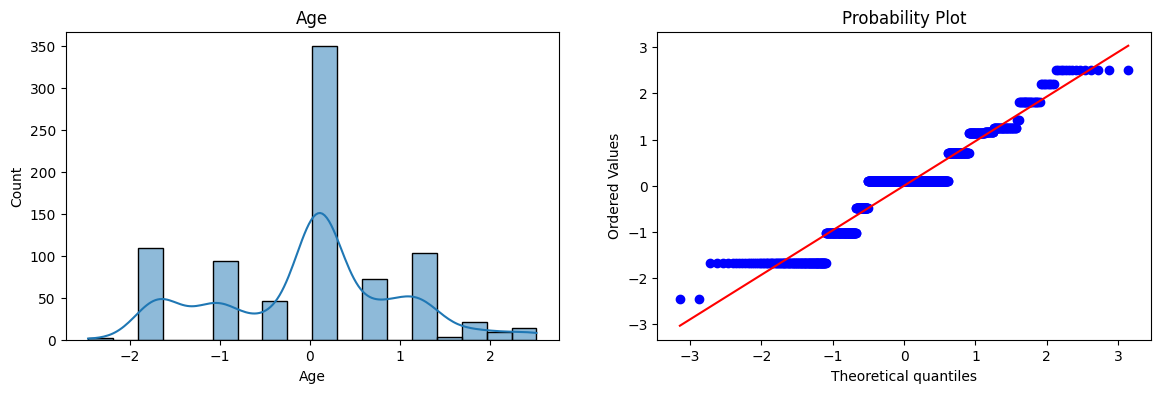

In [109]:
# QQ plot after the power transformation :
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)

    plt.show()


### Trying to apply power Transformation on selected columns 

In [132]:
X_train.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [175]:
pt = PowerTransformer()
X_train_transformed1=pt.fit_transform(X_train[['Cement','Water','Coarse Aggregate','Fine Aggregate','Age']])
X_test_transformed1=pt.fit_transform(X_test[['Cement','Water','Coarse Aggregate','Fine Aggregate','Age']])

pd.DataFrame({"Col":['Cement','Water','Coarse Aggregate','Fine Aggregate','Age'], 'lambda':pt.lambdas_})

,Col,lambda
0,Cement,0.213025
1,Water,0.958936
2,Coarse Aggregate,1.192751
3,Fine Aggregate,1.975085
4,Age,-0.062443


In [186]:
X_train_transformed1.isnull().sum()

Cement              0
Water               0
Coarse Aggregate    0
Fine Aggregate      0
Age                 0
dtype: int64

In [187]:
X_train_transformed1=pd.DataFrame(X_train_transformed1,columns=['Cement','Water','Coarse Aggregate','Fine Aggregate','Age'])
X_test_transformed1=pd.DataFrame(X_test_transformed1,columns=['Cement','Water','Coarse Aggregate','Fine Aggregate','Age'])

In [177]:
X_train_transformed1.head()

,Cement,Water,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,-0.301917,-0.262504,-0.677567,0.105778
1,1.244813,-0.165051,-1.912717,-0.314063,0.105778
2,0.079751,-1.047299,1.018407,0.025954,-1.664976
3,-0.145770,0.581232,-1.750770,0.583249,0.105778
4,-1.131111,-1.105305,1.368579,0.262619,-1.664976


In [178]:
X_test_transformed1.head()

,Cement,Water,Coarse Aggregate,Fine Aggregate,Age
0,0.060593,2.197675,-0.525881,-1.395911,2.168426
1,1.009038,-0.732597,-0.354837,-0.356595,-1.029648
2,1.240569,-1.623275,-0.354837,-0.356595,0.133922
3,1.009038,-0.732597,-0.354837,-0.356595,-1.695732
4,-1.622542,0.994906,-1.961792,1.200659,0.133922


In [200]:
X_train_remaining = X_train_transformed.drop(['Cement','Water','Coarse Aggregate','Fine Aggregate','Age'],axis=1)
X_test_remaining = X_test_transformed.drop(['Cement','Water','Coarse Aggregate','Fine Aggregate','Age'],axis=1)


In [201]:
X_train_final = pd.concat([X_train_transformed1,X_train_remaining],axis=1)
X_test_final = pd.concat([X_test_transformed1,X_test_remaining],axis=1)

In [202]:
X_train_final.isnull().sum()

Cement                0
Water                 0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Blast Furnace Slag    0
Fly Ash               0
Superplasticizer      0
dtype: int64

In [203]:
X_test_final.isnull().sum()

Cement                0
Water                 0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Blast Furnace Slag    0
Fly Ash               0
Superplasticizer      0
dtype: int64

In [204]:
X_train_final.shape


(824, 8)

In [205]:
X_test_final.shape

(206, 8)

In [207]:
model = LinearRegression()
model.fit(X_train_final , Y_train)
y_pred=model.predict(X_test_final)
r2_score(Y_test ,y_pred) # R2 score is between 0 - 1 

0.8215630377456213

In [208]:
# cross val to check the r2 score 
checkedR2=np.mean(cross_val_score(model , X_train_final,Y_train , scoring='r2'))
print(np.round(checkedR2.item(),2)*100,'%')

80.0 %


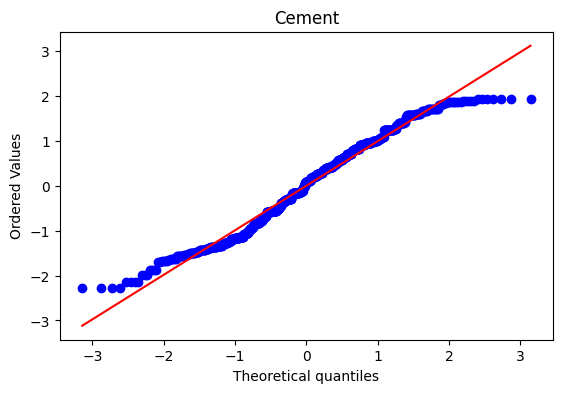

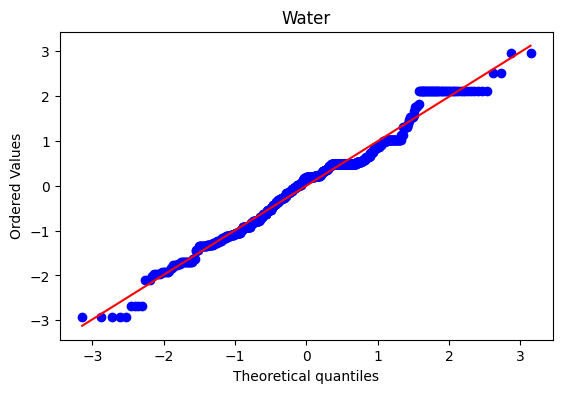

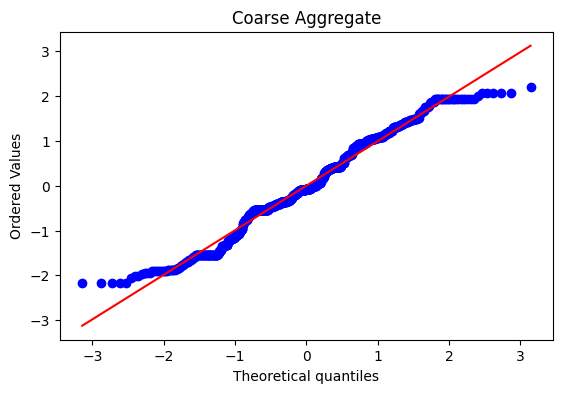

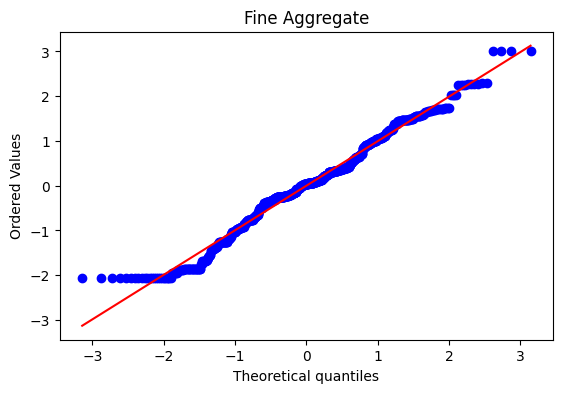

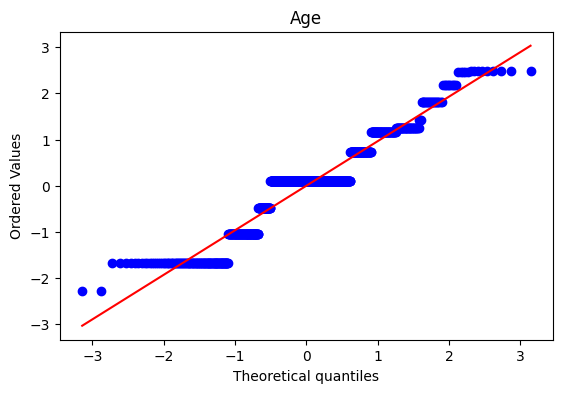

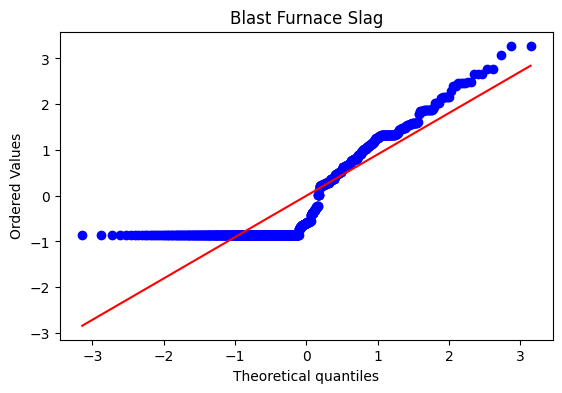

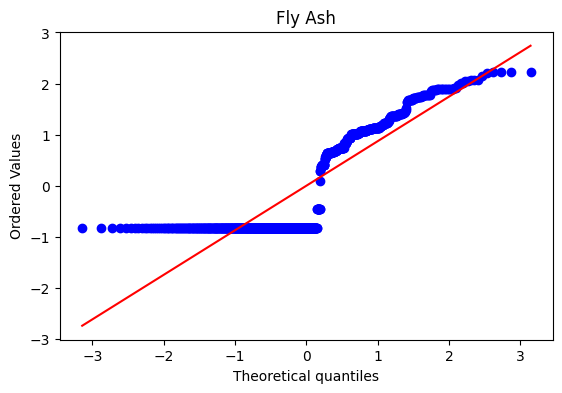

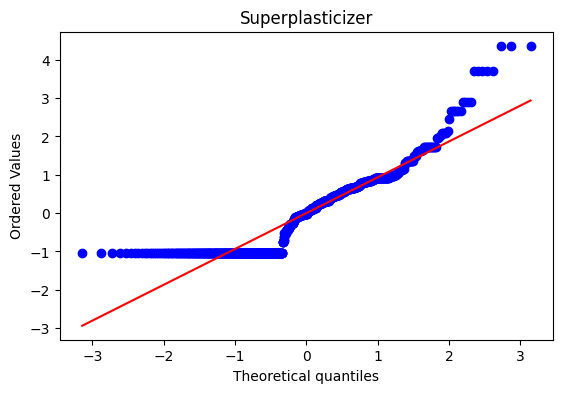

In [209]:
for col in X_train_final.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(122)
    stats.probplot(X_train_final[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show()

### **trying to transform blastfurnance , Fly ash ,Superplasticizer using log transform and all the remaining with power transform  

In [215]:
X_train.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [216]:
X_train.shape

(824, 8)

In [217]:
X_test.shape

(206, 8)

In [212]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [222]:
trans = ColumnTransformer([
    ('tnf1',FunctionTransformer(func=np.log1p),['Blast Furnace Slag','Fly Ash','Superplasticizer']),
    ('tnf2',PowerTransformer(),['Cement','Water','Coarse Aggregate','Fine Aggregate','Age'])
],remainder='passthrough')

In [223]:
X_train_transformed=trans.fit_transform(X_train)
X_test_transformed = trans.fit_transform(X_test)

In [225]:
model = LinearRegression()
model.fit(X_train_transformed , Y_train)
y_pred = model.predict(X_test_transformed)
r2_score(Y_test ,y_pred)

0.8146521951981062

In [230]:
cross_val = np.mean(cross_val_score(model , X_train_transformed , Y_train ,scoring='r2'))
score=np.round(cross_val,2)*100
score.item()

80.0

In [231]:
X_train_transformed = pd.DataFrame(X_train_transformed , columns=X_train.columns)

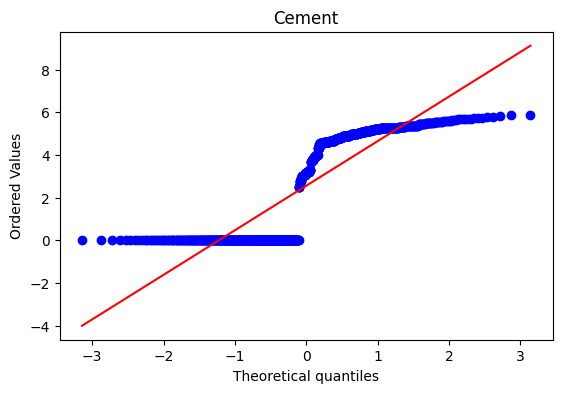

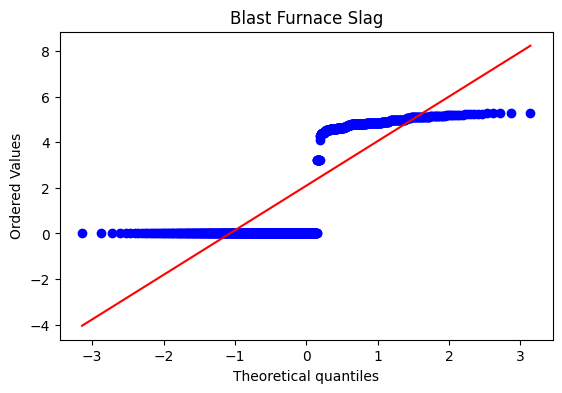

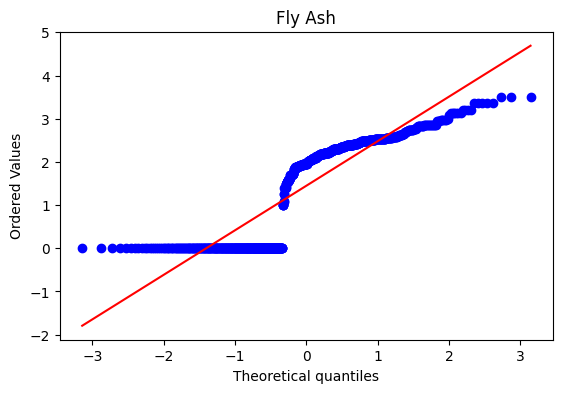

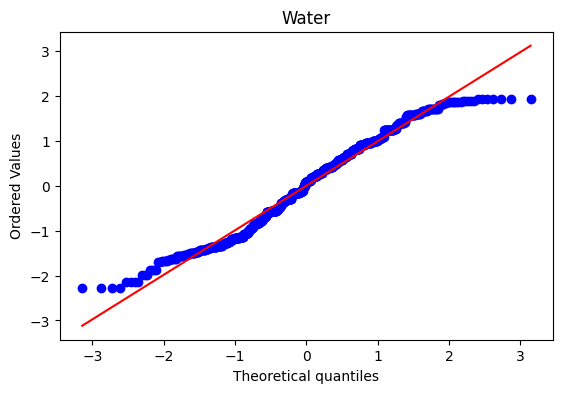

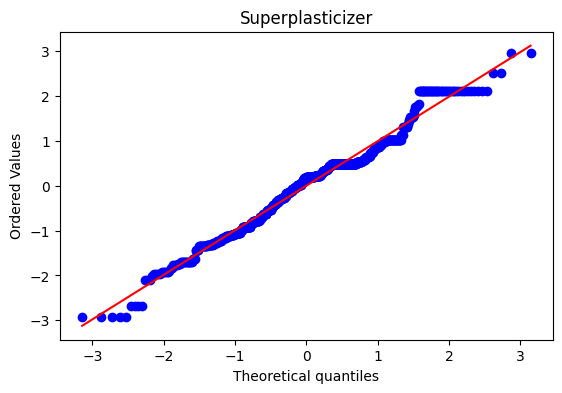

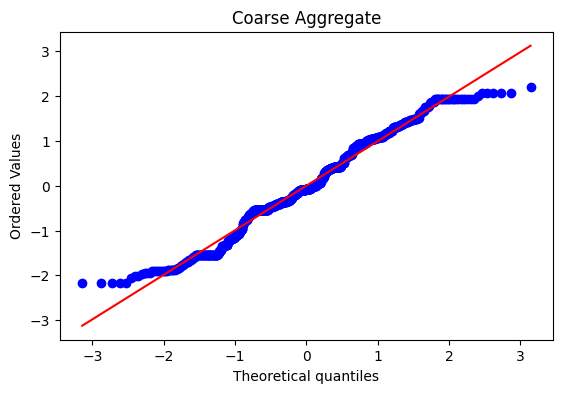

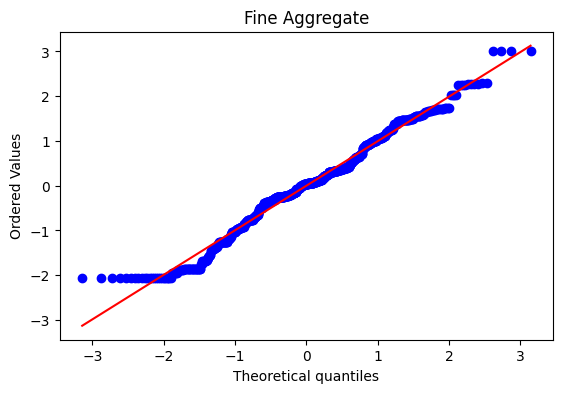

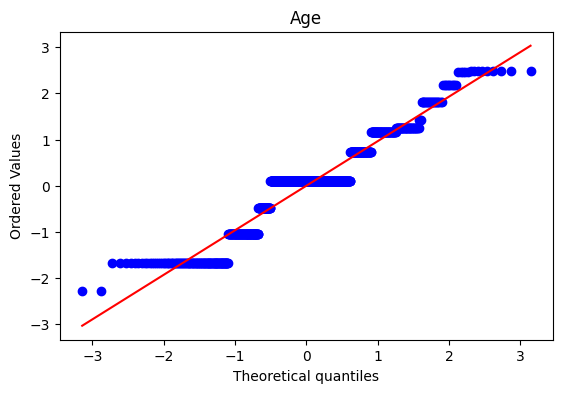

In [233]:
for col in X_train_transformed:
    plt.figure(figsize=(14,4))
    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()